In [1]:
from nltk.tokenize import word_tokenize
import re
import nltk
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/Jatin/Downloads/Major Project/Dataset/Fake Review/train.csv")

In [3]:
df.head()

,opinion,hotel,polarity,review
0,deceptive,affinia,negative,What I hoped would be a pleasant stay turned i...
1,deceptive,affinia,negative,Affinia hotel in Chicago was one of the most i...
2,deceptive,affinia,negative,What a terrible experience my family and I had...
3,deceptive,affinia,negative,"Hello, I recently stayed at the Affinia hotel ..."
4,deceptive,affinia,negative,The Affinia in Chicago obviously caters to wed...


In [4]:
df.loc[df["opinion"] == "deceptive", "opinion"] = 0
df.loc[df["opinion"] == "truthful", "opinion"] = 1
df.loc[df["polarity"] == "negative", "polarity"] = 0
df.loc[df["polarity"] == "positive", "polarity"] = 1
df.head()

,opinion,hotel,polarity,review
0,0,affinia,0,What I hoped would be a pleasant stay turned i...
1,0,affinia,0,Affinia hotel in Chicago was one of the most i...
2,0,affinia,0,What a terrible experience my family and I had...
3,0,affinia,0,"Hello, I recently stayed at the Affinia hotel ..."
4,0,affinia,0,The Affinia in Chicago obviously caters to wed...


## Punctuation Counts

In [5]:
import string
punc_set = set(string.punctuation)

def punc_count(text):
    ans = 0
    for char in text:
        if char in punc_set:
            ans = ans + 1
    
    return ans

In [6]:
df["punc_count"] = df["review"].apply(punc_count)

In [7]:
df.head()

,opinion,hotel,polarity,review,punc_count
0,0,affinia,0,What I hoped would be a pleasant stay turned i...,12
1,0,affinia,0,Affinia hotel in Chicago was one of the most i...,13
2,0,affinia,0,What a terrible experience my family and I had...,6
3,0,affinia,0,"Hello, I recently stayed at the Affinia hotel ...",14
4,0,affinia,0,The Affinia in Chicago obviously caters to wed...,20


In [8]:
df.loc[0, "review"]

"What I hoped would be a pleasant stay turned into a nightmare. The first sign of trouble at the Affinia was that they couldn't find my reservation. Add to that the room service delivered cold food after a long wait and the mini bar was not well stocked. The internet service was so slow it was unusable. To top it off the street noise seemed to penetrate the thin walls with ease making getting a good night sleep nearly impossible. Finally, I discovered the valet parking, which was a $49 premium service, dented my fender and scratched the door paint on my car. I highly recommend going elsewhere when you visit Chicago."

## Plotting punctuation counts

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

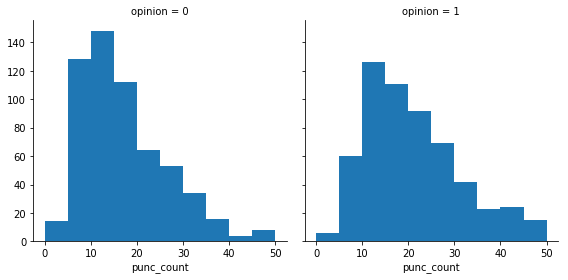

In [21]:
g = sns.FacetGrid(df, col = "opinion", size = 4)
g.map(plt.hist, "punc_count", range = (0, 50))

## Review Lengths

In [11]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
def calc_len(text):
    word_list = text.split(" ")
    ans = 0
    for word in word_list:
        if (word not in punc_set) and (word not in stop):
            ans = ans + 1
    
    return ans

In [12]:
df["length"] = df["review"].apply(calc_len)

In [13]:
df.head()

,opinion,hotel,polarity,review,punc_count,length
0,0,affinia,0,What I hoped would be a pleasant stay turned i...,12,69
1,0,affinia,0,Affinia hotel in Chicago was one of the most i...,13,86
2,0,affinia,0,What a terrible experience my family and I had...,6,40
3,0,affinia,0,"Hello, I recently stayed at the Affinia hotel ...",14,50
4,0,affinia,0,The Affinia in Chicago obviously caters to wed...,20,97


## Plotting review lengths

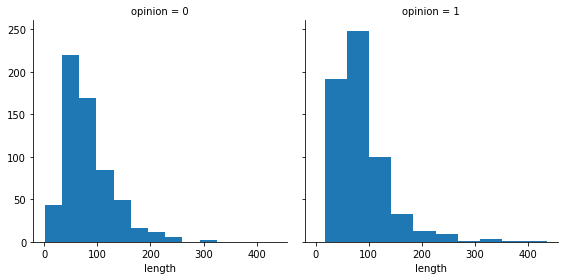

In [14]:
g = sns.FacetGrid(df, col = "opinion", size = 4)
g.map(plt.hist, "length")

In [15]:
df["opinion"].value_counts()

1    600
0    600
Name: opinion, dtype: int64

## Pronouns

This feature tells about the number of personal and possessive pronouns.

In [16]:
def calc_pronoun(text):
    words = word_tokenize(text)
    val = 0
    pos_words = nltk.pos_tag(words)
    for tup in pos_words:
        if re.search("PRP?", tup[1]):
            val += 1
            
    return val

In [17]:
df["pronouns"] = df["review"].apply(calc_pronoun)

In [18]:
df.head()

,opinion,hotel,polarity,review,punc_count,length,pronouns
0,0,affinia,0,What I hoped would be a pleasant stay turned i...,12,69,10
1,0,affinia,0,Affinia hotel in Chicago was one of the most i...,13,86,17
2,0,affinia,0,What a terrible experience my family and I had...,6,40,6
3,0,affinia,0,"Hello, I recently stayed at the Affinia hotel ...",14,50,5
4,0,affinia,0,The Affinia in Chicago obviously caters to wed...,20,97,16


## Plotting number of Pronouns

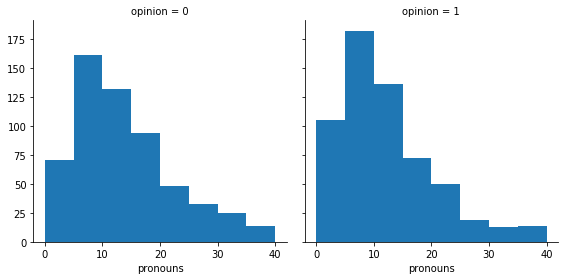

In [19]:
g = sns.FacetGrid(df, col = "opinion", size = 4)
g.map(plt.hist, "pronouns", range = (0, 40), bins = 8)

## Hotel Name

This feature defines whether the review contains the name of the hotel or not.

In [20]:
def check_hotel_name(row):
    review = row["review"].lower()
    hotel = row["hotel"].lower()
    if hotel in review:
        return 1
    else:
        return 0

In [21]:
df["hotel_name"] = df[["hotel", "review"]].apply(check_hotel_name, axis = 1)
df.head()

,opinion,hotel,polarity,review,punc_count,length,pronouns,hotel_name
0,0,affinia,0,What I hoped would be a pleasant stay turned i...,12,69,10,1
1,0,affinia,0,Affinia hotel in Chicago was one of the most i...,13,86,17,1
2,0,affinia,0,What a terrible experience my family and I had...,6,40,6,1
3,0,affinia,0,"Hello, I recently stayed at the Affinia hotel ...",14,50,5,1
4,0,affinia,0,The Affinia in Chicago obviously caters to wed...,20,97,16,1


In [22]:
hotel_name_counts = df["hotel_name"].value_counts()

In [23]:
hotel_name_counts

1    715
0    485
Name: hotel_name, dtype: int64

In [24]:
bar_plot_df = df.pivot_table(index = "opinion", columns = ["hotel_name"], values = ["review"], aggfunc = "count")
bar_plot_df.head()

review     
hotel_name      0    1
opinion               
0             162  438
1             323  277

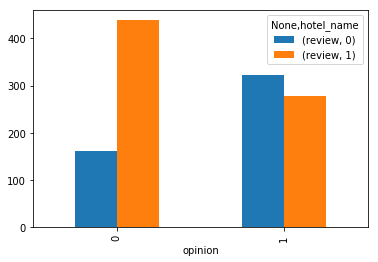

In [25]:
ax = bar_plot_df.plot.bar()

## Generate Rating

### Loading Pickle file

In [26]:
import re
import string
table = str.maketrans("", "", string.punctuation + "\t")

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def preprocess(text):
    # removing punctuations
    no_punc = text.translate(table)
    
    # removing numbers
    no_num = re.sub("[0-9]+", "", no_punc)
    
    # lowercasing, stopwords removal
    # porter stemming
    return " ".join([stemmer.stem(word) for word in no_num.split()])

In [27]:
import pickle
cv_senti_analyser_path = "./cv_senti_pipeline.pkl"
cv_senti_analyser_pkl = open(cv_senti_analyser_path, 'rb')
cv_senti_analyser_model = pickle.load(cv_senti_analyser_pkl)

In [28]:
df["predicted rating"] = cv_senti_analyser_model.predict(df["review"])

In [29]:
df["predicted rating"].value_counts()

5    440
1    368
2    183
4    144
3     65
Name: predicted rating, dtype: int64

In [30]:
df.head()

,opinion,hotel,polarity,review,punc_count,length,pronouns,hotel_name,predicted rating
0,0,affinia,0,What I hoped would be a pleasant stay turned i...,12,69,10,1,1
1,0,affinia,0,Affinia hotel in Chicago was one of the most i...,13,86,17,1,1
2,0,affinia,0,What a terrible experience my family and I had...,6,40,6,1,1
3,0,affinia,0,"Hello, I recently stayed at the Affinia hotel ...",14,50,5,1,1
4,0,affinia,0,The Affinia in Chicago obviously caters to wed...,20,97,16,1,1


## Predicting polarity of review

In [31]:
def get_polar(row):
    if row["predicted rating"] == 3:
        return row["polarity"]
    elif row["predicted rating"] > 3:
        return 1
    else:
        return 0

In [32]:
df["predicted polarity"] = df[["predicted rating", "polarity"]].apply(get_polar, axis = 1)
df.head()

,opinion,hotel,polarity,review,punc_count,length,pronouns,hotel_name,predicted rating,predicted polarity
0,0,affinia,0,What I hoped would be a pleasant stay turned i...,12,69,10,1,1,0
1,0,affinia,0,Affinia hotel in Chicago was one of the most i...,13,86,17,1,1,0
2,0,affinia,0,What a terrible experience my family and I had...,6,40,6,1,1,0
3,0,affinia,0,"Hello, I recently stayed at the Affinia hotel ...",14,50,5,1,1,0
4,0,affinia,0,The Affinia in Chicago obviously caters to wed...,20,97,16,1,1,0


In [33]:
df.loc[df["polarity"] == df["predicted polarity"],"polarity_mismatch"] = 0
df.loc[df["polarity"] != df["predicted polarity"],"polarity_mismatch"] = 1
df["polarity_mismatch"] = df["polarity_mismatch"].astype("int")

In [34]:
df.head()

,opinion,hotel,polarity,review,punc_count,length,pronouns,hotel_name,predicted rating,predicted polarity,polarity_mismatch
0,0,affinia,0,What I hoped would be a pleasant stay turned i...,12,69,10,1,1,0,0
1,0,affinia,0,Affinia hotel in Chicago was one of the most i...,13,86,17,1,1,0,0
2,0,affinia,0,What a terrible experience my family and I had...,6,40,6,1,1,0,0
3,0,affinia,0,"Hello, I recently stayed at the Affinia hotel ...",14,50,5,1,1,0,0
4,0,affinia,0,The Affinia in Chicago obviously caters to wed...,20,97,16,1,1,0,0


### Analyzing predicted and actual polarity of review

In [35]:
opinion_grouped = df.groupby("opinion")
for name, group in opinion_grouped:
    if name == 0:
        print("Deceptive", group["polarity_mismatch"].value_counts(), sep = "\n")
    if name == 1:
        print("Truthful", group["polarity_mismatch"].value_counts(), sep = "\n")

Deceptive
0    577
1     23
Name: polarity_mismatch, dtype: int64
Truthful
0    571
1     29
Name: polarity_mismatch, dtype: int64


## Rating Deviation of review

In [36]:
def calc_dev(row):
    if(row["polarity"] == 1):
        return (5 - row["predicted rating"])
    elif(row["polarity"] == 0):
        return (row["predicted rating"] - 1)

In [37]:
df["rating deviation"] = df[["polarity", "predicted rating"]].apply(calc_dev,axis = 1)

In [38]:
df["rating deviation"].value_counts()

0    793
1    290
2     65
3     37
4     15
Name: rating deviation, dtype: int64

In [39]:
opinion_grouped = df.groupby("opinion")
for name, group in opinion_grouped:
    if name == 0:
        print("Deceptive")
        print(group["rating deviation"].value_counts())
    elif name == 1:
        print("Truthful")
        print(group["rating deviation"].value_counts())

Deceptive
0    456
1     93
2     28
3     16
4      7
Name: rating deviation, dtype: int64
Truthful
0    337
1    197
2     37
3     21
4      8
Name: rating deviation, dtype: int64


In [40]:
df.head()

,opinion,hotel,polarity,review,punc_count,length,pronouns,hotel_name,predicted rating,predicted polarity,polarity_mismatch,rating deviation
0,0,affinia,0,What I hoped would be a pleasant stay turned i...,12,69,10,1,1,0,0,0
1,0,affinia,0,Affinia hotel in Chicago was one of the most i...,13,86,17,1,1,0,0,0
2,0,affinia,0,What a terrible experience my family and I had...,6,40,6,1,1,0,0,0
3,0,affinia,0,"Hello, I recently stayed at the Affinia hotel ...",14,50,5,1,1,0,0,0
4,0,affinia,0,The Affinia in Chicago obviously caters to wed...,20,97,16,1,1,0,0,0


## Average rating of hotels

In [41]:
import numpy as np
avg_hotel_rating_df = df.pivot_table(index = "hotel", values = ["predicted rating"], aggfunc = np.mean)
avg_hotel_rating_df

,predicted rating
hotel,
affinia,3.000000
allegro,3.066667
amalfi,3.100000
ambassador,3.283333
conrad,2.950000
fairmont,3.066667
hardrock,3.166667
hilton,2.983333
homewood,3.183333


From above, we see that the average rating of every hotel is 3. So, we will calculate the deviation of rating of any review wit this avg rating of the hotel

## Average rating deviation

In [42]:
df["avg deviation"] = df["predicted rating"].apply(lambda x: int(abs(x - 3)))
df.head()

,opinion,hotel,polarity,review,punc_count,length,pronouns,hotel_name,predicted rating,predicted polarity,polarity_mismatch,rating deviation,avg deviation
0,0,affinia,0,What I hoped would be a pleasant stay turned i...,12,69,10,1,1,0,0,0,2
1,0,affinia,0,Affinia hotel in Chicago was one of the most i...,13,86,17,1,1,0,0,0,2
2,0,affinia,0,What a terrible experience my family and I had...,6,40,6,1,1,0,0,0,2
3,0,affinia,0,"Hello, I recently stayed at the Affinia hotel ...",14,50,5,1,1,0,0,0,2
4,0,affinia,0,The Affinia in Chicago obviously caters to wed...,20,97,16,1,1,0,0,0,2


In [43]:
df["avg deviation"].value_counts()

2    808
1    327
0     65
Name: avg deviation, dtype: int64

In [44]:
opinion_grouped = df.groupby("opinion")
for name, group in opinion_grouped:
    if name == 0:
        print("Deceptive")
        print(group["avg deviation"].value_counts())
    elif name == 1:
        print("Truthful")
        print(group["avg deviation"].value_counts())

Deceptive
2    463
1    109
0     28
Name: avg deviation, dtype: int64
Truthful
2    345
1    218
0     37
Name: avg deviation, dtype: int64


From above figures, it is seen that the fake reviews tends to deviate more from the avg hotel rating

In [45]:
features = ["punc_count", "length", "pronouns", "hotel_name", "polarity_mismatch", "rating deviation", "avg deviation"]

## Training classifier

In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [47]:
xtrain = df[features]
ytrain = df["opinion"].astype(int)

In [48]:
xtrain.head()

,punc_count,length,pronouns,hotel_name,polarity_mismatch,rating deviation,avg deviation
0,12,69,10,1,0,0,2
1,13,86,17,1,0,0,2
2,6,40,6,1,0,0,2
3,14,50,5,1,0,0,2
4,20,97,16,1,0,0,2


In [49]:
opinion_clf = GaussianNB()
opinion_clf.fit(xtrain, ytrain)

GaussianNB(priors=None)

## Testing accuracy with test data

In [50]:
test_df = pd.read_csv("C:/Users/Jatin/Downloads/Major Project/Dataset/Fake Review/test.csv")

In [51]:
test_df.head()

,opinion,hotel,polarity,review
0,deceptive,affinia,negative,My wife and I stayed at the Affinia Chicago la...
1,deceptive,affinia,negative,There are many high-quality hotels in Chicago....
2,deceptive,affinia,negative,I recently stayed at the Affina Chicago hotel ...
3,deceptive,affinia,negative,I stayed at the Affnia hotel in Chicago and wa...
4,deceptive,affinia,negative,Extremely disappointed in our stay. This hotel...


In [52]:
test_df.loc[test_df["opinion"] == "deceptive", "opinion"] = 0
test_df.loc[test_df["opinion"] == "truthful", "opinion"] = 1
test_df.loc[test_df["polarity"] == "negative", "polarity"] = 0
test_df.loc[test_df["polarity"] == "positive", "polarity"] = 1
test_df.head()

,opinion,hotel,polarity,review
0,0,affinia,0,My wife and I stayed at the Affinia Chicago la...
1,0,affinia,0,There are many high-quality hotels in Chicago....
2,0,affinia,0,I recently stayed at the Affina Chicago hotel ...
3,0,affinia,0,I stayed at the Affnia hotel in Chicago and wa...
4,0,affinia,0,Extremely disappointed in our stay. This hotel...


In [53]:
test_df["punc_count"] = test_df["review"].apply(punc_count)
test_df.head()

,opinion,hotel,polarity,review,punc_count
0,0,affinia,0,My wife and I stayed at the Affinia Chicago la...,27
1,0,affinia,0,There are many high-quality hotels in Chicago....,17
2,0,affinia,0,I recently stayed at the Affina Chicago hotel ...,23
3,0,affinia,0,I stayed at the Affnia hotel in Chicago and wa...,27
4,0,affinia,0,Extremely disappointed in our stay. This hotel...,11


In [54]:
test_df["length"] = test_df["review"].apply(calc_len)
test_df.head()

,opinion,hotel,polarity,review,punc_count,length
0,0,affinia,0,My wife and I stayed at the Affinia Chicago la...,27,106
1,0,affinia,0,There are many high-quality hotels in Chicago....,17,51
2,0,affinia,0,I recently stayed at the Affina Chicago hotel ...,23,134
3,0,affinia,0,I stayed at the Affnia hotel in Chicago and wa...,27,72
4,0,affinia,0,Extremely disappointed in our stay. This hotel...,11,66


In [55]:
test_df["pronouns"] = test_df["review"].apply(calc_pronoun)
test_df.head()

,opinion,hotel,polarity,review,punc_count,length,pronouns
0,0,affinia,0,My wife and I stayed at the Affinia Chicago la...,27,106,21
1,0,affinia,0,There are many high-quality hotels in Chicago....,17,51,8
2,0,affinia,0,I recently stayed at the Affina Chicago hotel ...,23,134,25
3,0,affinia,0,I stayed at the Affnia hotel in Chicago and wa...,27,72,13
4,0,affinia,0,Extremely disappointed in our stay. This hotel...,11,66,4


In [56]:
test_df["hotel_name"] = test_df[["hotel", "review"]].apply(check_hotel_name, axis = 1)
test_df.head()

,opinion,hotel,polarity,review,punc_count,length,pronouns,hotel_name
0,0,affinia,0,My wife and I stayed at the Affinia Chicago la...,27,106,21,1
1,0,affinia,0,There are many high-quality hotels in Chicago....,17,51,8,1
2,0,affinia,0,I recently stayed at the Affina Chicago hotel ...,23,134,25,0
3,0,affinia,0,I stayed at the Affnia hotel in Chicago and wa...,27,72,13,0
4,0,affinia,0,Extremely disappointed in our stay. This hotel...,11,66,4,0


In [57]:
test_df["predicted rating"] = cv_senti_analyser_model.predict(test_df["review"])
test_df.head()

,opinion,hotel,polarity,review,punc_count,length,pronouns,hotel_name,predicted rating
0,0,affinia,0,My wife and I stayed at the Affinia Chicago la...,27,106,21,1,1
1,0,affinia,0,There are many high-quality hotels in Chicago....,17,51,8,1,1
2,0,affinia,0,I recently stayed at the Affina Chicago hotel ...,23,134,25,0,1
3,0,affinia,0,I stayed at the Affnia hotel in Chicago and wa...,27,72,13,0,2
4,0,affinia,0,Extremely disappointed in our stay. This hotel...,11,66,4,0,1


In [58]:
test_df["predicted polarity"] = test_df[["predicted rating", "polarity"]].apply(get_polar, axis = 1)
test_df.head()

,opinion,hotel,polarity,review,punc_count,length,pronouns,hotel_name,predicted rating,predicted polarity
0,0,affinia,0,My wife and I stayed at the Affinia Chicago la...,27,106,21,1,1,0
1,0,affinia,0,There are many high-quality hotels in Chicago....,17,51,8,1,1,0
2,0,affinia,0,I recently stayed at the Affina Chicago hotel ...,23,134,25,0,1,0
3,0,affinia,0,I stayed at the Affnia hotel in Chicago and wa...,27,72,13,0,2,0
4,0,affinia,0,Extremely disappointed in our stay. This hotel...,11,66,4,0,1,0


In [59]:
test_df.loc[test_df["polarity"] == test_df["predicted polarity"],"polarity_mismatch"] = 0
test_df.loc[test_df["polarity"] != test_df["predicted polarity"],"polarity_mismatch"] = 1
test_df["polarity_mismatch"] = test_df["polarity_mismatch"].astype("int")
test_df.head()

,opinion,hotel,polarity,review,punc_count,length,pronouns,hotel_name,predicted rating,predicted polarity,polarity_mismatch
0,0,affinia,0,My wife and I stayed at the Affinia Chicago la...,27,106,21,1,1,0,0
1,0,affinia,0,There are many high-quality hotels in Chicago....,17,51,8,1,1,0,0
2,0,affinia,0,I recently stayed at the Affina Chicago hotel ...,23,134,25,0,1,0,0
3,0,affinia,0,I stayed at the Affnia hotel in Chicago and wa...,27,72,13,0,2,0,0
4,0,affinia,0,Extremely disappointed in our stay. This hotel...,11,66,4,0,1,0,0


In [60]:
test_df["rating deviation"] = test_df[["polarity", "predicted rating"]].apply(calc_dev,axis = 1)
test_df.head()

,opinion,hotel,polarity,review,punc_count,length,pronouns,hotel_name,predicted rating,predicted polarity,polarity_mismatch,rating deviation
0,0,affinia,0,My wife and I stayed at the Affinia Chicago la...,27,106,21,1,1,0,0,0
1,0,affinia,0,There are many high-quality hotels in Chicago....,17,51,8,1,1,0,0,0
2,0,affinia,0,I recently stayed at the Affina Chicago hotel ...,23,134,25,0,1,0,0,0
3,0,affinia,0,I stayed at the Affnia hotel in Chicago and wa...,27,72,13,0,2,0,0,1
4,0,affinia,0,Extremely disappointed in our stay. This hotel...,11,66,4,0,1,0,0,0


In [61]:
test_df["avg deviation"] = test_df["predicted rating"].apply(lambda x: int(abs(x - 3)))
test_df.head()

,opinion,hotel,polarity,review,punc_count,length,pronouns,hotel_name,predicted rating,predicted polarity,polarity_mismatch,rating deviation,avg deviation
0,0,affinia,0,My wife and I stayed at the Affinia Chicago la...,27,106,21,1,1,0,0,0,2
1,0,affinia,0,There are many high-quality hotels in Chicago....,17,51,8,1,1,0,0,0,2
2,0,affinia,0,I recently stayed at the Affina Chicago hotel ...,23,134,25,0,1,0,0,0,2
3,0,affinia,0,I stayed at the Affnia hotel in Chicago and wa...,27,72,13,0,2,0,0,1,1
4,0,affinia,0,Extremely disappointed in our stay. This hotel...,11,66,4,0,1,0,0,0,2


In [62]:
xtest = test_df[features]
ytest = test_df["opinion"].astype(int)

In [63]:
opinion_clf.score(xtest, ytest)

0.6375

We get **63.75%** accuracy with naive bayes!!

In [81]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 1)
lr.fit(xtrain, ytrain)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [82]:
lr.score(xtest, ytest)

0.6975

We get **69.75%** accuracy with logistic regression!!

In [73]:
from sklearn.svm import LinearSVC
svm = LinearSVC(dual = False)
svm.fit(xtrain, ytrain)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [74]:
svm.score(xtest, ytest)

0.69

We get **69.00%** accuracy with SVM!!